In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno

# Basic data exploration

In [4]:
raw_data = pd.read_csv("data/immo_data.csv")

In [5]:
raw_data
# basic view of the data

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [6]:
raw_data.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,10295.498789,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,5941.973488,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5178.750000,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,10263.500000,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,15438.250000,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
raw_data['Unnamed: 0'].nunique()

16512

<AxesSubplot:>

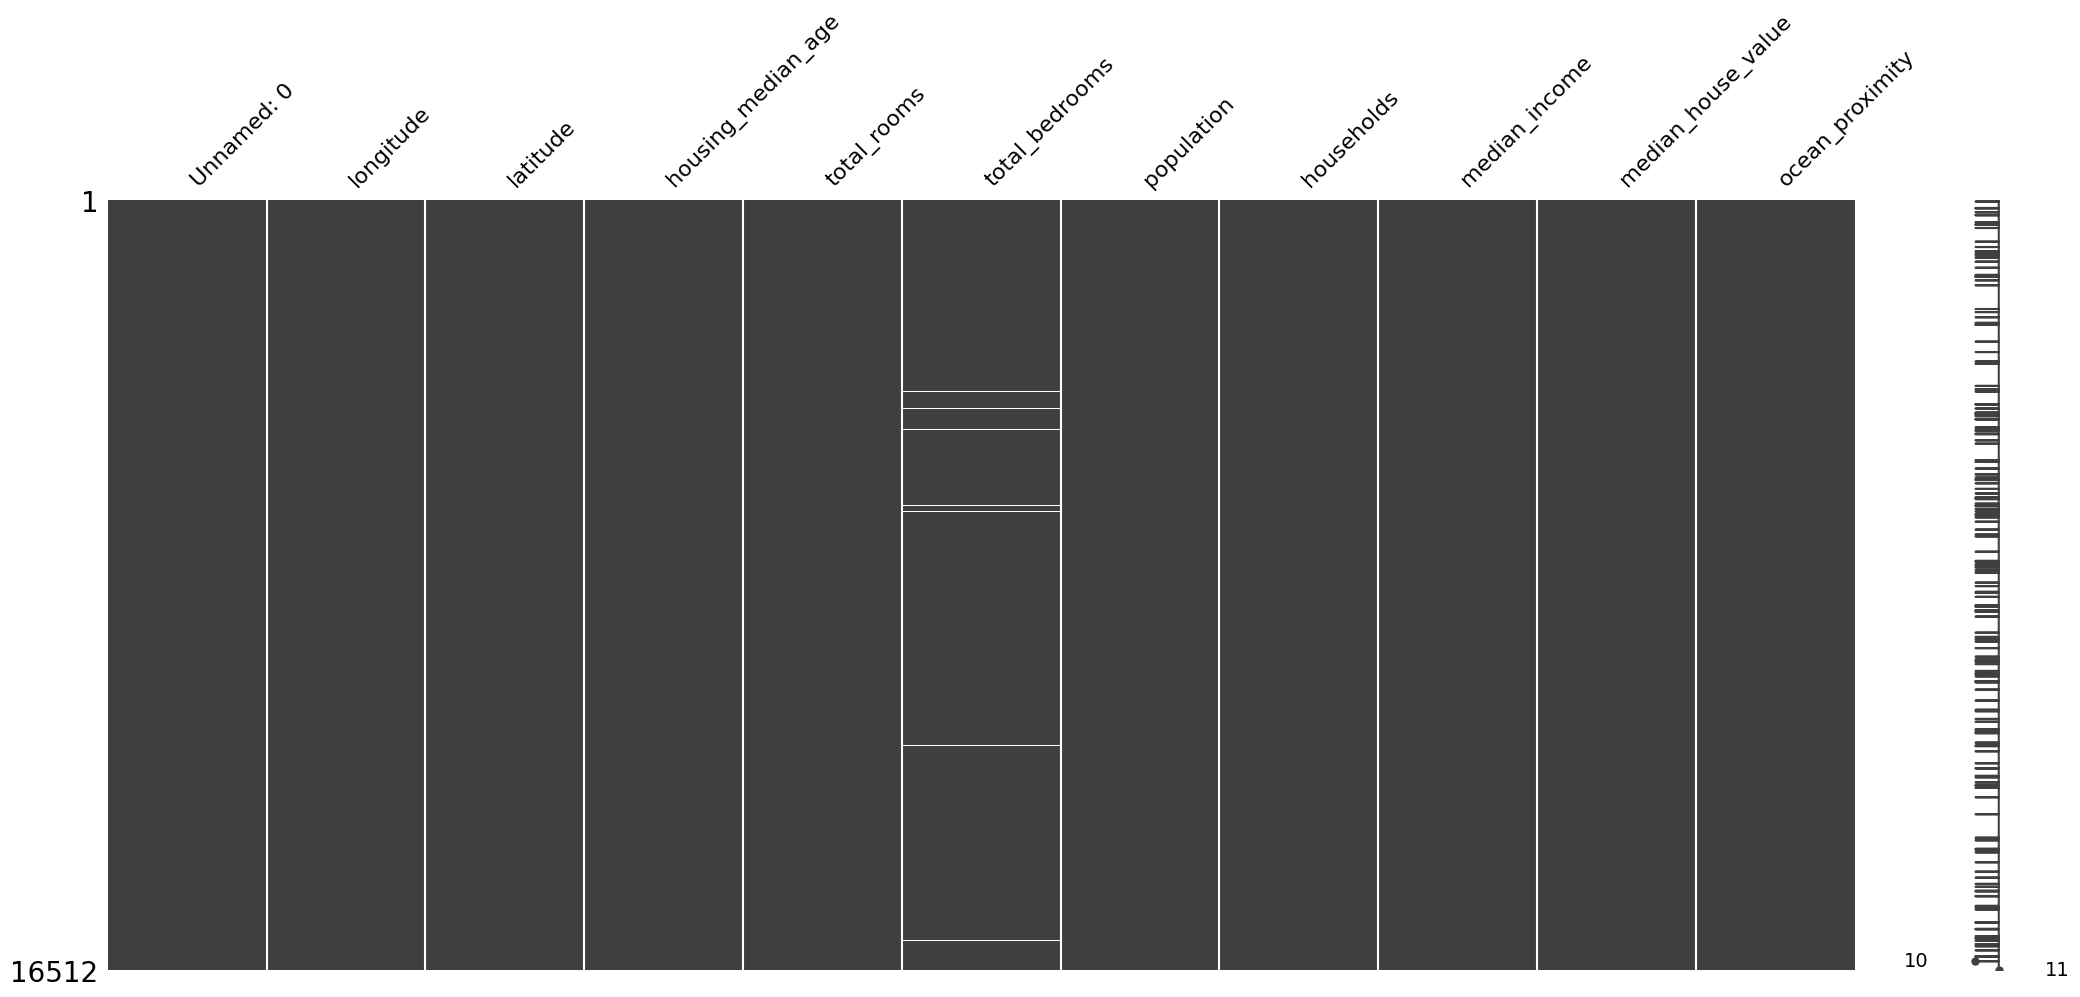

In [8]:
%matplotlib inline
msno.matrix(raw_data)

In [9]:
# how many total missing values do we have?
total_cells = np.product(raw_data.shape)
missing_values_count = raw_data.isnull().sum()
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = ((total_missing / total_cells) * 100).round(2)
print('Percent missing =', percent_missing)
print(total_missing)

Percent missing = 0.1
176


# - 1st Iteration EDA

In [10]:
raw_data_nan_to_zero = raw_data.fillna(0)

In [11]:
raw_data_nan_to_zero.to_csv('data/raw_data_nan_to_zero.csv')

# - 2nd Iteration EDA

In [12]:
# Create a mapping dictionary to map the string values to integers
mapping = {
    'INLAND': 0,
    '<1H OCEAN': 1,
    'NEAR OCEAN': 2,
    'NEAR BAY': 3,
    'ISLAND': 4
}

# Use the replace method to replace the values in the 'ocean_proximity' column with the mapped integers
raw_data['ocean_proximity'] = raw_data['ocean_proximity'].replace(mapping)
raw_data

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,3
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1


In [13]:
raw_data_nan_to_zero = raw_data.fillna(0)

In [14]:
raw_data_nan_to_zero.to_csv('data/raw_data_nan_to_zero.csv')

# - 3rd Iteration EDA

In [15]:
raw_data_nan_to_mean = raw_data.fillna(raw_data['total_bedrooms'].mean())

In [16]:
raw_data_nan_to_mean.to_csv('data/raw_data_nan_to_mean.csv')

# - 4th Iteration EDA

In [17]:
raw_data_nan_to_med = raw_data.fillna(raw_data['total_bedrooms'].median())

In [18]:
raw_data_nan_to_med.to_csv('data/raw_data_nan_to_med.csv')

# - 5th Iteration EDA

In [19]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
ocean_proximity_1hot = encoder.fit_transform(raw_data[['ocean_proximity']])
ocean_proximity_1hot = ocean_proximity_1hot.toarray()
ocean_proximity_df = pd.DataFrame(ocean_proximity_1hot, columns=encoder.get_feature_names(['ocean_proximity']))
raw_data_encoded = pd.concat([raw_data, ocean_proximity_df], axis=1)
raw_data_encoded = raw_data_encoded.drop(['ocean_proximity'], axis=1)
raw_data_encoded

/home/eliana/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_0,ocean_proximity_1,ocean_proximity_2,ocean_proximity_3,ocean_proximity_4
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,1.0,0.0,0.0,0.0,0.0
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,0.0,1.0,0.0,0.0,0.0
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,1.0,0.0,0.0,0.0,0.0
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,0.0,1.0,0.0,0.0,0.0
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,1.0,0.0,0.0,0.0,0.0
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0.0,0.0,0.0,1.0,0.0
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,1.0,0.0,0.0,0.0,0.0
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,0.0,1.0,0.0,0.0,0.0


In [20]:
raw_data_encoded_fillna_mean = raw_data_encoded.fillna(raw_data['total_bedrooms'].mean())

In [21]:
raw_data_encoded_fillna_mean.to_csv('data/raw_data_encoded_fillna_mean.csv')

In [1]:
vroum vroum

SyntaxError: invalid syntax (2942374278.py, line 1)